In [1]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

In [3]:
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

In [4]:
input_img = Input(shape=(28, 28, 1))


In [5]:
x = Flatten()(input_img)
x = Dense(128, activation='relu')(x)
encoded = Dense(64, activation='relu')(x)

In [6]:
x = Dense(128, activation='relu')(encoded)
x = Dense(28 * 28, activation='sigmoid')(x)
decoded = Reshape((28, 28, 1))(x) # The "reconstructed" image


In [7]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [8]:
print("--- Training the simple autoencoder ---")
autoencoder.fit(
    x_train, 
    x_train,  # Note: The input and target are the same
    epochs=5,
    batch_size=32,
    shuffle=True,
    validation_data=(x_test, x_test),
    verbose=1
)

--- Training the simple autoencoder ---
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 0.1285 - val_loss: 0.0940
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0898 - val_loss: 0.0847
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0837 - val_loss: 0.0808
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0807 - val_loss: 0.0788
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0787 - val_loss: 0.0771


In [9]:
print("\n--- Reconstructing test images ---")
reconstructed_images = autoencoder.predict(x_test)


--- Reconstructing test images ---
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Displaying 10 sample results...


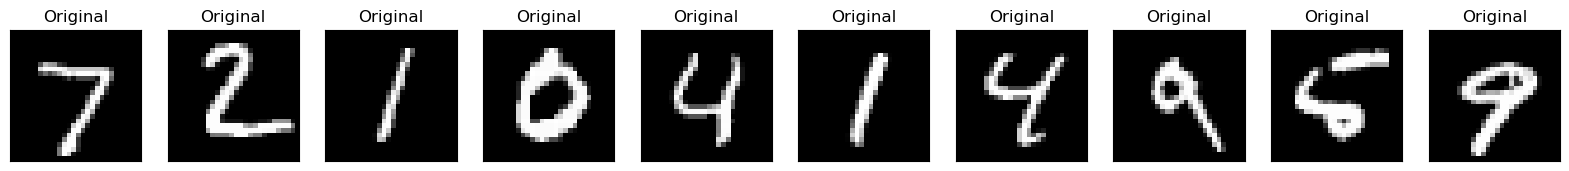

In [10]:
print("Displaying 10 sample results...")
n = 10
plt.figure(figsize=(20, 4)) # 2 rows, 10 columns
for i in range(n):
    # Display Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.set_title("Original")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

Saved comparison image to 'autoencoder_results.png'


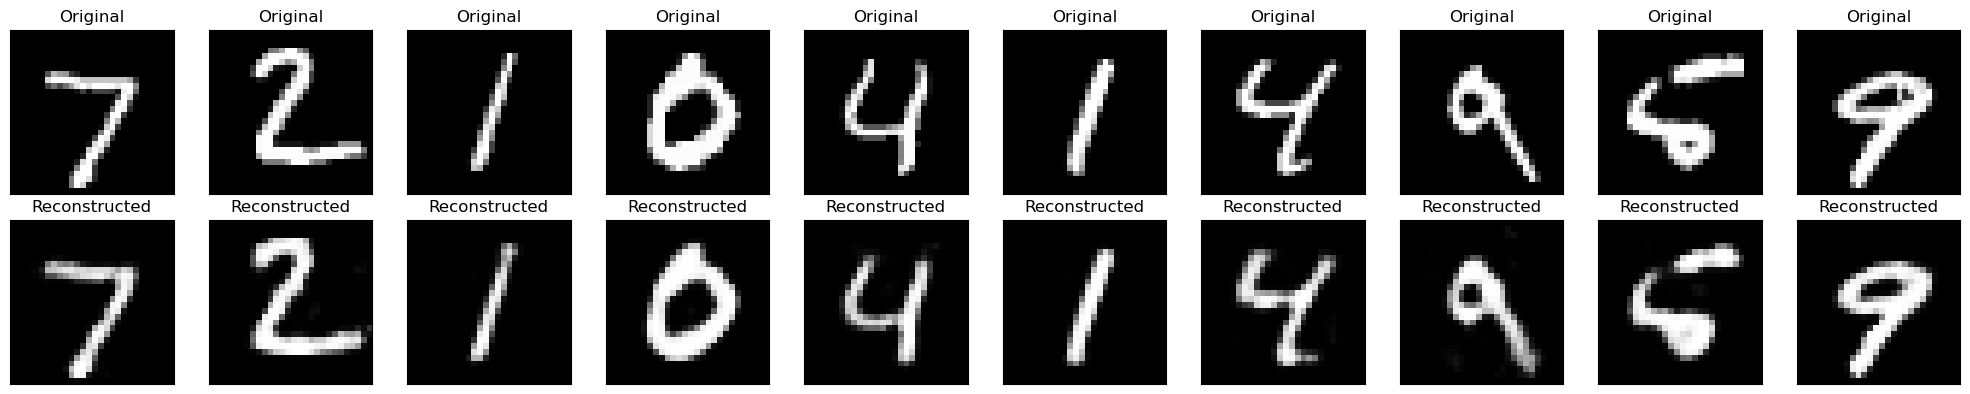